- source : https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

In [1]:
import pandas as pd       
import os
import sklearn
import math 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import warnings

warnings.filterwarnings('ignore')

### 1.0 Audio File Overview

In [2]:
#The sample rate is the number of samples of audio carried per second, measured in Hz or kHz.
SAMPLE_RATE = 44100
FILE_PATH = 'D:\\Script\\Kuliah\\Tesis\\tesis\\cn_celeb_sound\\data\\id00006\\speech-06-144.flac'

In [3]:
#This returns an audio time series as a numpy array
x , sr = librosa.load(FILE_PATH, sr=SAMPLE_RATE)

In [4]:
ipd.Audio(x, rate=SAMPLE_RATE)

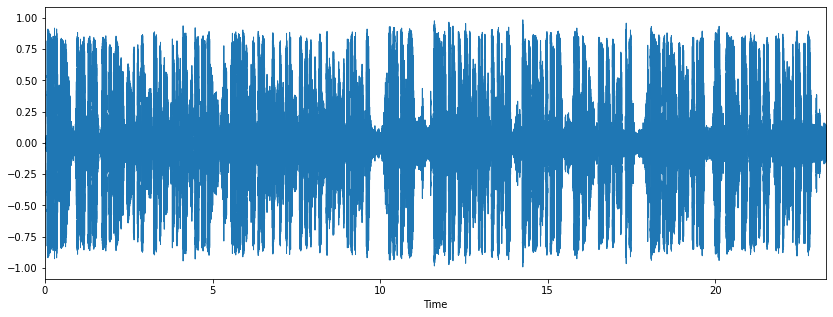

In [5]:
#waveplot
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr);

### 2.0 Spectogram

- A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.
- Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
- A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

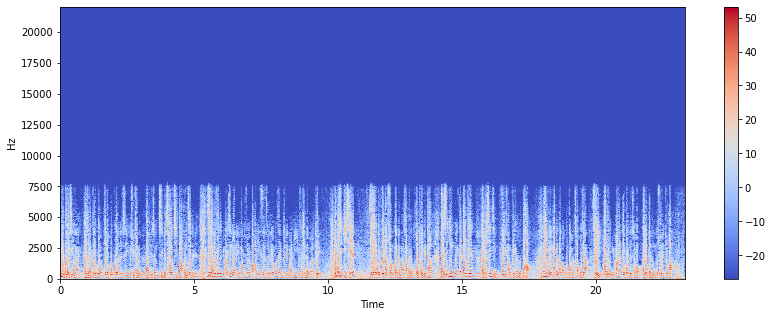

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

- .stft() converts data into short term Fourier transform.
- STFT converts signals such that we can know the amplitude of the given frequency at a given time.
- Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. 
- .specshow is used to display a spectrogram.

- The vertical axis shows frequencies (from 0 to 10kHz)
- the horizontal axis shows the time of the clip.
- Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

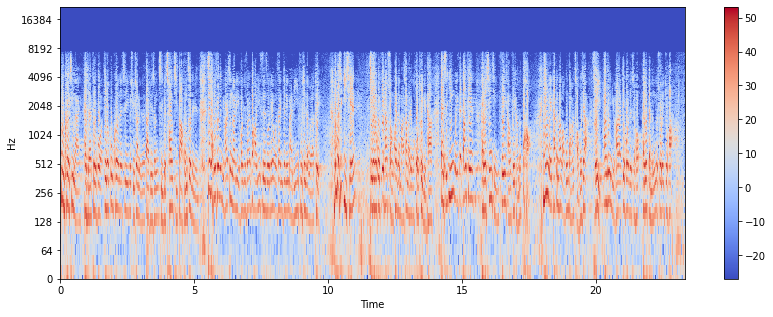

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

### 3.0 Feature extraction from Audio signal

- The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

#### 3.1 Spectral Centroid

- The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:

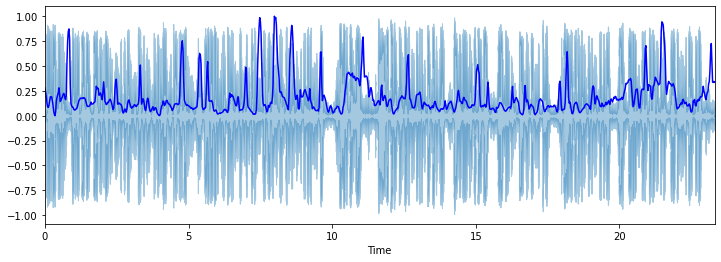

In [8]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b');

#### 3.2 Spectral Rolloff
- It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0.
- To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

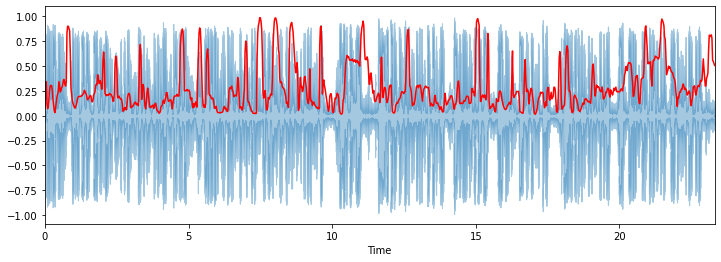

In [9]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r');

#### 3.3 Spectral Bandwidth

- The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

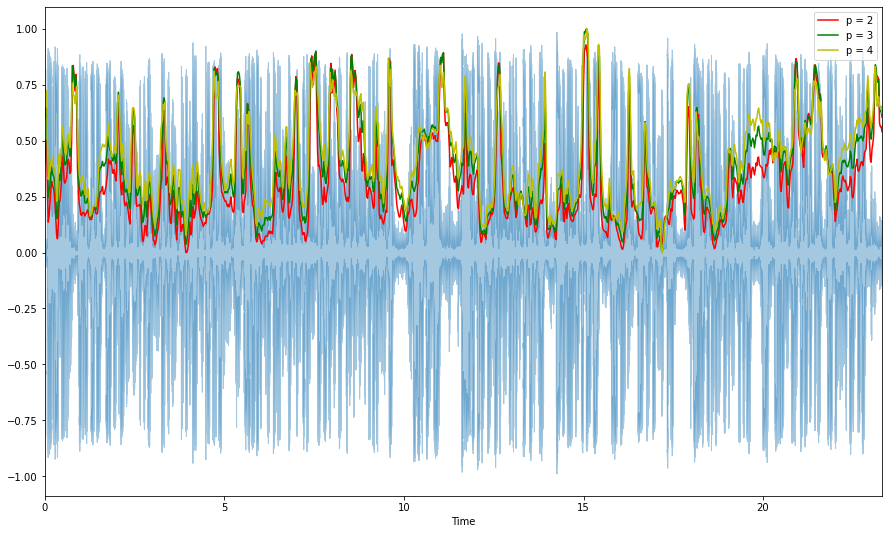

In [10]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'));

#### 3.4 Zero Crossings Rate

- A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal.
- A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

In [11]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

32123


#### 3.5 Mel-Frequency Cepstral Coefficients(MFCCs)

- The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
- It models the characteristics of the human voice.

(20, 2009)


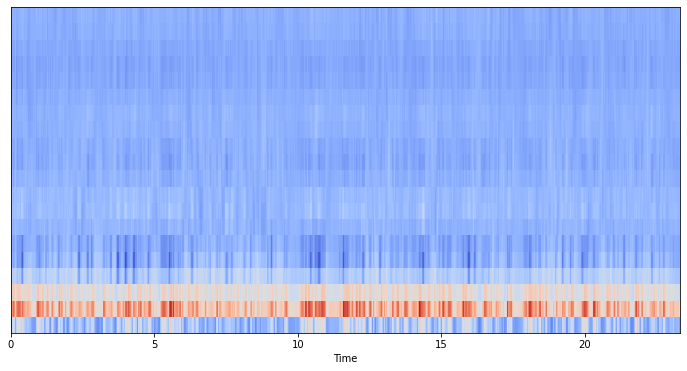

In [12]:
mfccs = librosa.feature.mfcc(x, sr=5)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

#### 3.6 Chroma Feature

- A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal.
- In short, It provides a robust way to describe a similarity measure between music pieces.

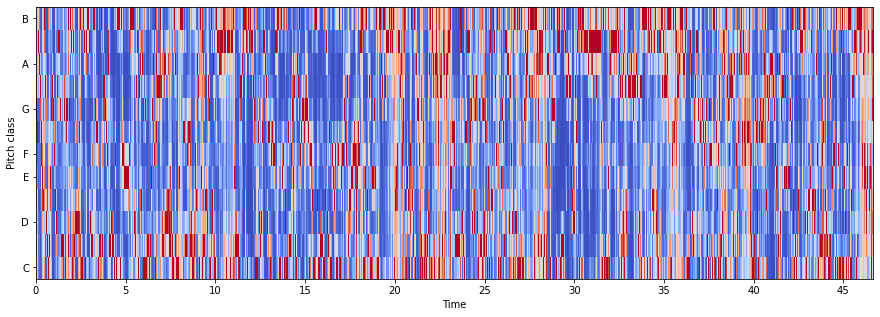

In [13]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm');

### 4.0 Music Genre Clf

In [14]:
#import library
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
import warnings

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [15]:
#convert audio file into spectogram
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'D:\\Script\\Kuliah\\Tesis\\tutorials\\data\\img_data\\{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'D:\\Script\\Kuliah\\Tesis\\tutorials\\data\genres\\{g}'):
        songname = f'D:\\Script\\Kuliah\\Tesis\\tutorials\\data\\genres\\{g}\\{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap,
                     sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'D:\\Script\\Kuliah\\Tesis\\tutorials\\data\\img_data\\{g}\\{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [16]:
#create header for csv file to save feature
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [17]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [18]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'D:\\Script\\Kuliah\\Tesis\\tutorials\\data\genres\\{g}'):
        songname = f'D:\\Script\\Kuliah\\Tesis\\tutorials\\data\genres\\{g}\\{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {round(np.mean(e),5)}'
        to_append += f'{g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [19]:
data = pd.read_csv(r'dataset.csv')

In [20]:
data['label'] = data['filename'].str.split('.', expand=True)[0]
data['mfcc20'] = data['mfcc20'].apply(lambda x: x[:8]).astype('float64')

In [25]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158819,42.351028,...,8.81067,-3.66737,5.75169,-5.16276,0.75095,-1.69194,-0.40995,-2.30021,1.21993,blues
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874691,...,5.37680,-2.23912,4.21696,-6.01227,0.93611,-0.71654,0.29388,-0.28743,0.53157,blues
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109961,31.689020,...,5.78926,-8.90522,-1.08372,-9.21836,2.45581,-7.72690,-1.81572,-3.43343,-2.22681,blues
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431168,150.099213,5.647590,26.871929,...,6.08768,-2.47642,-1.07389,-2.87478,0.78098,-3.31693,0.63798,-0.61969,-3.40823,blues
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153299,...,-2.80638,-6.93412,-7.55862,-9.17355,-4.51216,-5.45354,-0.92416,-4.40933,-11.70370,blues


In [22]:
# Dropping unneccesary columns
data = data.drop(['filename'], axis=1)

In [23]:
#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [24]:
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
800/800 [==============================] - 0s 270us/step - loss: 2.1594 - accuracy: 0.2362
Epoch 2/100
800/800 [==============================] - 0s 35us/step - loss: 1.8378 - accuracy: 0.3450
Epoch 3/100
800/800 [==============================] - 0s 32us/step - loss: 1.6194 - accuracy: 0.4225
Epoch 4/100
800/800 [==============================] - 0s 32us/step - loss: 1.4445 - accuracy: 0.5013
Epoch 5/100
800/800 [==============================] - 0s 26us/step - loss: 1.3118 - accuracy: 0.5512
Epoch 6/100
800/800 [==============================] - 0s 31us/step - loss: 1.2147 - accuracy: 0.5863
Epoch 7/100
800/800 [==============================] - 0s 26us/step - loss: 1.1153 - accuracy: 0.6350
Epoch 8/100
800/800 [==============================] - 0s 45us/step - loss: 1.0351 - accuracy: 0.6538
Epoch 9/100
800/800 [==============================] - 0s 36us/step - loss: 0.9677 - accuracy: 0.6800
Epoch 10/100
800/800 [==============================] - 0s 32us/step - loss: 0.91